<a href="https://colab.research.google.com/github/Simon-creator-jara/Inteligencia_artificial/blob/main/Examen_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import mnist,fashion_mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Flatten, Dense, Reshape,Conv2D,MaxPooling2D,Conv2DTranspose

In [ ]:
(x_train, _), (x_test, _) = mnist.load_data()

# Normalizar los datos
x_train = x_train.astype('float32')/255.
x_test = x_test.astype('float32')/255.

print (x_train.shape)
print (x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
train_data= np.reshape(x_train, (len(x_train), 28, 28, 1))
test_data= np.reshape(x_test, (len(x_test), 28, 28, 1))
print (train_data.shape)
print (test_data.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


# Se crean imagenes con ruido

In [ ]:
noisy_array = train_data + 0.2 * np.random.normal(loc=0.0, scale=1.0, size=train_data.shape)
noisy_train_data=np.clip(noisy_array, 0.0, 1.0)

In [ ]:
noisy_array = test_data + 0.2 * np.random.normal(loc=0.0, scale=1.0, size=test_data.shape)
noisy_test_data=np.clip(noisy_array, 0.0, 1.0)

In [ ]:
test_data

In [ ]:
noisy_test_data

In [ ]:
testear=np.concatenate([test_data,noisy_test_data])
testear.shape

(20000, 28, 28, 1)

In [ ]:
from sklearn.utils.multiclass import type_of_target
type_of_target(test_data)

'unknown'

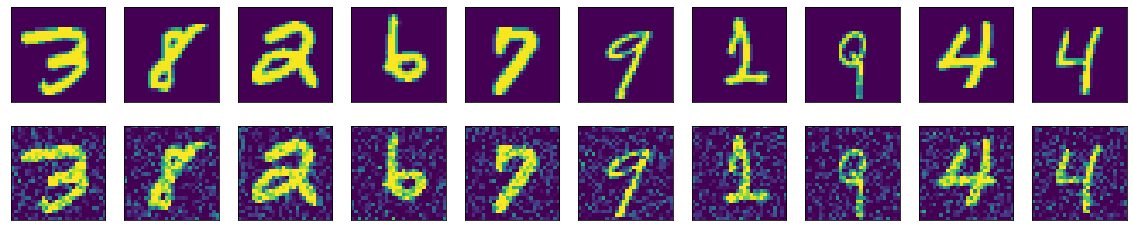

In [ ]:
indices = np.random.randint(len(train_data), size=10)
images1 = train_data[indices, :]
images2 = noisy_train_data[indices, :]
plt.figure(figsize=(20, 4))
for i, (images1, images2) in enumerate(zip(images1, images2)):
  ax = plt.subplot(2, 10, i + 1)
  plt.imshow(images1.reshape(28, 28),)
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  ax = plt.subplot(2, 10, i + 1 + 10)
  plt.imshow(images2.reshape(28, 28))
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

plt.show()

In [ ]:
input = layers.Input(shape=(28, 28, 1))

# Encoder
encoder = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(input)
encoder = layers.MaxPooling2D((2, 2), padding="same")(encoder)
encoder = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(encoder)
encoder = layers.MaxPooling2D((2, 2), padding="same")(encoder)

# Decoder
decoder = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(encoder)
decoder = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(decoder)
decoder = layers.Conv2D(1, (3, 3), activation="sigmoid", padding="same")(decoder)

# Autoencoder
autoencoder = Model(input, decoder)
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_transpose_2 (Conv2DT  (None, 14, 14, 32)       9248

In [ ]:
autoencoder.fit(
x=train_data,
    y=train_data,
    epochs=20,
    batch_size=128,
    shuffle=True,
    validation_data=(test_data, test_data),
)

Epoch 1/20
469/469 [==============================] - 5s 10ms/step - loss: 0.1389 - val_loss: 0.0730
Epoch 2/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0714 - val_loss: 0.0693
Epoch 3/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0691 - val_loss: 0.0679
Epoch 4/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0679 - val_loss: 0.0670
Epoch 5/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0672 - val_loss: 0.0665
Epoch 6/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0667 - val_loss: 0.0660
Epoch 7/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0663 - val_loss: 0.0657
Epoch 8/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0659 - val_loss: 0.0654
Epoch 9/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0657 - val_loss: 0.0651
Epoch 10/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0654 - val_loss: 0.064

In [ ]:
reconstructions = autoencoder.predict(train_data)
train_loss = tf.keras.losses.mae(reconstructions, train_data)
threshold = np.mean(train_loss) + np.std(train_loss)
print("Umbral: ", threshold)

Umbral:  0.045860127


In [ ]:
reconstructions = autoencoder.predict(noisy_train_data)
test_loss = tf.keras.losses.mae(reconstructions, noisy_train_data)
threshold_2 = np.mean(test_loss) + np.std(test_loss)
print("Umbral: ", threshold_2)

Umbral:  0.19223419012708598


In [ ]:
# Predecir 
reconstructions = autoencoder.predict(testear)
#reconstructions=reconstructions.flatten()
#testear=testear.flatten()
#loss = tf.keras.losses.mae(reconstructions, testear)


In [ ]:
lista=[]
for i in range(len(reconstructions)):
  x=tf.keras.losses.mae(reconstructions[i,:,:,0], testear[i,:,:,0])
  #print(reconstructions[i])
  threshold_x = np.mean(x) + np.std(x)
  if threshold_x<=threshold:
    lista.append(1)
  else:
    lista.append(0)

In [ ]:
indices = np.random.randint(len(testear), size=10)
images1 = testear[indices, :]
images2 = reconstructions[indices, :]
plt.figure(figsize=(20, 4))
for i, (images1, images2) in enumerate(zip(images1, images2)):
  ax = plt.subplot(2, 10, i + 1)
  plt.imshow(images1.reshape(28, 28),)
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  ax = plt.subplot(2, 10, i + 1 + 10)
  plt.imshow(images2.reshape(28, 28))
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

plt.show()

In [ ]:
lista_res=[]
for i in range(0,10000):
  lista_res.append(1)

In [ ]:
for i in range(0,10000):
  lista_res.append(0)

In [ ]:
print("Accuracy = {}".format(accuracy_score(lista,lista_res)))
print("Precision = {}".format(precision_score(lista,lista_res)))
print("Recall = {}".format(recall_score(lista,lista_res)))

Accuracy = 0.99875
Precision = 0.9975
Recall = 1.0
